## Trabalho de dinâmica das máquinas

In [1]:
from sympy import *
from sympy.physics.continuum_mechanics import Beam
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
R0,RL,P,x,s = symbols('R0 R_L P x s') #criando as reações nos apoios (R0 e RL) e a carga exercida pelas engrenagens(P)
L,E,I = symbols('L E I ', positive = True) #criando os parametros geométricos e mecânicos

In [3]:
viga = Beam(L,E,I) #criando o elemento viga

In [4]:
viga.apply_load(P,L/4,-1)  #aplicando o carregamento da primeira engrenagem, os parametros são (valor da força, posição de aplicação e o expoente da Macaulay)
viga.apply_load(P,(3*L)/4,-1)

In [5]:
viga.apply_support(0,type='pin') #passando os tipos dos apoios
viga.apply_support(L,type='roller')

C:\Users\abner\anaconda3\lib\site-packages\sympy\plotting\plot.py:1376: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(**a)


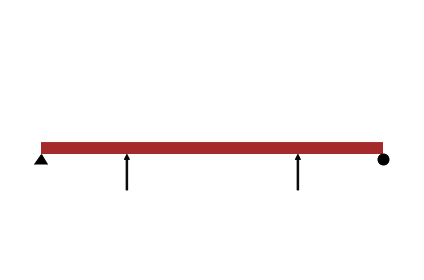

In [6]:
viga.draw().show()

In [7]:
viga.load

P*SingularityFunction(x, L/4, -1) + P*SingularityFunction(x, 3*L/4, -1) + R_0*SingularityFunction(x, 0, -1) + R_L*SingularityFunction(x, L, -1)

In [8]:
r0,rl = symbols('R_0 R_L')

In [9]:
viga.solve_for_reaction_loads(r0,rl) #descobirndo as reações nos apoios

In [10]:
viga.reaction_loads[r0] #reação no primeiro apoio

-P

In [11]:
viga.reaction_loads[rl] #reação no segundo apoio

-P

In [12]:
viga.load #equação da carga

-P*SingularityFunction(x, 0, -1) + P*SingularityFunction(x, L/4, -1) + P*SingularityFunction(x, 3*L/4, -1) - P*SingularityFunction(x, L, -1)

In [13]:
viga.shear_force()  #equação do esforço cortante

P*SingularityFunction(x, 0, 0) - P*SingularityFunction(x, L/4, 0) - P*SingularityFunction(x, 3*L/4, 0) + P*SingularityFunction(x, L, 0)

In [14]:
viga.bending_moment()  #equação do momento fletor

P*SingularityFunction(x, 0, 1) - P*SingularityFunction(x, L/4, 1) - P*SingularityFunction(x, 3*L/4, 1) + P*SingularityFunction(x, L, 1)

In [15]:
viga.slope()  #equação da inclinação

(3*L**2*P/32 - P*SingularityFunction(x, 0, 2)/2 + P*SingularityFunction(x, L/4, 2)/2 + P*SingularityFunction(x, 3*L/4, 2)/2 - P*SingularityFunction(x, L, 2)/2)/(E*I)

In [16]:
viga.deflection()  #equação da deflexão

(3*L**2*P*x/32 - P*SingularityFunction(x, 0, 3)/6 + P*SingularityFunction(x, L/4, 3)/6 + P*SingularityFunction(x, 3*L/4, 3)/6 - P*SingularityFunction(x, L, 3)/6)/(E*I)

In [17]:
dic = {L:1.2192, P:356, E:207*10**9, I:1.277*10**(-9)}

In [18]:
dfl1 = viga.deflection().subs('x', L/4)
dfl1

L**3*P/(48*E*I)

In [19]:
dfl1 = dfl1.subs(dic)  #deflexão no ponto 1
dfl1

0.0508478248852269

In [20]:
dfl2 = viga.deflection().subs('x',(3*L/4))  #deflexão no ponto 2
dfl2

L**3*P/(48*E*I)

In [21]:
dfl2 = dfl2.subs(dic)
dfl2

0.0508478248852269

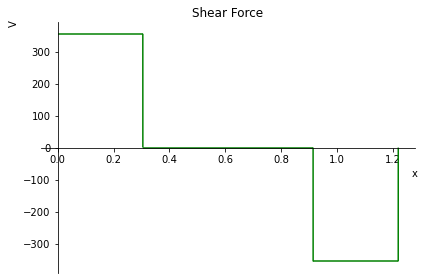

In [22]:
viga.plot_shear_force(dic)

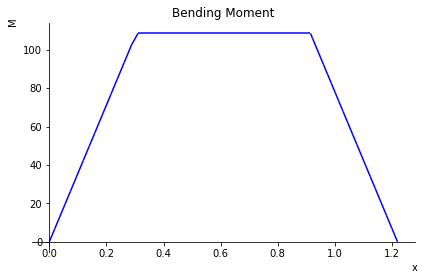

In [23]:
viga.plot_bending_moment(dic)

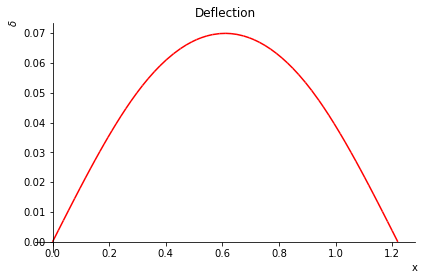

In [24]:
viga.plot_deflection(dic)

---

##### Encontrando a frequência pelo método de Rayleigh:

In [25]:
w1,d1,d2,g, m1, m2 = symbols('omega delta_1 delta_2 g m_1 m_2')

In [26]:
w1 = (g*((m1*d1)+(m2*d2))/((m1*d1**2)+(m2*d2**2)))**0.5
w1

(g*(delta_1*m_1 + delta_2*m_2)/(delta_1**2*m_1 + delta_2**2*m_2))**0.5

In [27]:
dic1 = {g:9.81,m1:36.2874,m2:36.2874,d1:dfl1,d2:dfl2}

In [28]:
w1.subs(dic1)

13.8898742444378

---

* Encontrando a deflexão com a aplicação de uma carga unitária:

In [29]:
## Criando uma viga com uma carga pontual em l/4:
viga1 = Beam(L,E,I)

In [30]:
viga1.apply_load(1,L/4,-1)

In [31]:
viga1.apply_support(0,type='pin')
viga1.apply_support(L,type='roller')

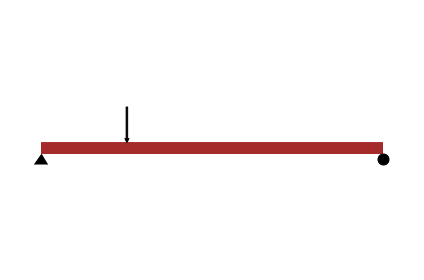

In [32]:
viga1.draw().show()

In [33]:
viga1.load

R_0*SingularityFunction(x, 0, -1) + R_L*SingularityFunction(x, L, -1) + SingularityFunction(x, L/4, -1)

In [34]:
r0,rl = symbols('R_0 R_L')

In [35]:
viga1.solve_for_reaction_loads(r0,rl)

In [36]:
viga1.reaction_loads[r0].subs(dic)

-3/4

In [37]:
viga1.reaction_loads[rl].subs(dic)

-1/4

In [38]:
viga1.load

-3*SingularityFunction(x, 0, -1)/4 + SingularityFunction(x, L/4, -1) - SingularityFunction(x, L, -1)/4

In [39]:
viga1.shear_force()

3*SingularityFunction(x, 0, 0)/4 - SingularityFunction(x, L/4, 0) + SingularityFunction(x, L, 0)/4

In [40]:
viga1.bending_moment()

3*SingularityFunction(x, 0, 1)/4 - SingularityFunction(x, L/4, 1) + SingularityFunction(x, L, 1)/4

In [41]:
viga1.slope()

(7*L**2/128 - 3*SingularityFunction(x, 0, 2)/8 + SingularityFunction(x, L/4, 2)/2 - SingularityFunction(x, L, 2)/8)/(E*I)

In [42]:
viga1.deflection()

(7*L**2*x/128 - SingularityFunction(x, 0, 3)/8 + SingularityFunction(x, L/4, 3)/6 - SingularityFunction(x, L, 3)/24)/(E*I)

In [43]:
d11 = viga1.deflection().subs('x', L/4)
d11

3*L**3/(256*E*I)

In [44]:
d11.subs(dic)  #deflexão em 1 devido a carga aplicada em 1

8.03424199380341e-5

In [45]:
d12 = viga1.deflection().subs('x',(3*L)/4)
d12

7*L**3/(768*E*I)

In [46]:
d12.subs(dic) #deflexão em 2 devido a carga aplicada em 2

6.24885488406932e-5

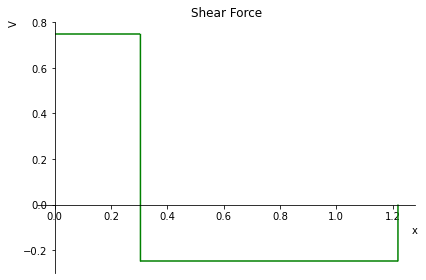

In [47]:
viga1.plot_shear_force(dic)

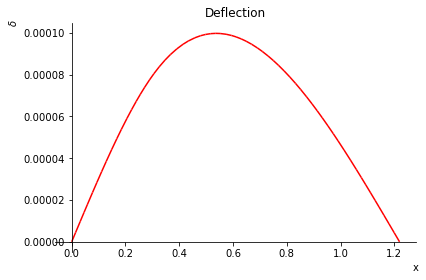

In [48]:
viga1.plot_deflection(dic)

In [49]:
# Criando uma viga com uma carga pontual em 3*L/4
viga2 = Beam(L,E,I)

In [50]:
viga2.apply_load(1,(3*L)/4,-1)

In [51]:
viga2.apply_support(0,type='pin')
viga2.apply_support(L,type='roller')

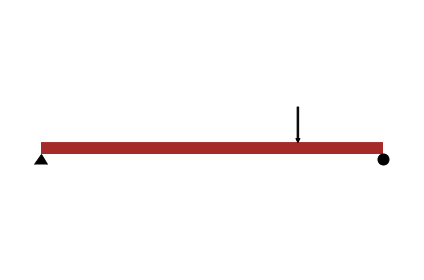

In [52]:
viga2.draw().show()

In [53]:
viga2.load

R_0*SingularityFunction(x, 0, -1) + R_L*SingularityFunction(x, L, -1) + SingularityFunction(x, 3*L/4, -1)

In [54]:
r0,rl = symbols('R_0 R_L')

In [55]:
viga2.solve_for_reaction_loads(r0,rl)

In [56]:
viga2.reaction_loads[r0].subs(dic)

-1/4

In [57]:
viga2.reaction_loads[rl].subs(dic)

-3/4

In [58]:
viga2.load

-SingularityFunction(x, 0, -1)/4 + SingularityFunction(x, 3*L/4, -1) - 3*SingularityFunction(x, L, -1)/4

In [59]:
viga2.shear_force()

SingularityFunction(x, 0, 0)/4 - SingularityFunction(x, 3*L/4, 0) + 3*SingularityFunction(x, L, 0)/4

In [60]:
viga2.bending_moment()

SingularityFunction(x, 0, 1)/4 - SingularityFunction(x, 3*L/4, 1) + 3*SingularityFunction(x, L, 1)/4

In [61]:
viga2.slope()

(5*L**2/128 - SingularityFunction(x, 0, 2)/8 + SingularityFunction(x, 3*L/4, 2)/2 - 3*SingularityFunction(x, L, 2)/8)/(E*I)

In [62]:
viga2.deflection()

(5*L**2*x/128 - SingularityFunction(x, 0, 3)/24 + SingularityFunction(x, 3*L/4, 3)/6 - SingularityFunction(x, L, 3)/8)/(E*I)

In [63]:
d22 = viga2.deflection().subs('x',(3*L)/4) #deflexão em 2 devido a carga em 2
d22

3*L**3/(256*E*I)

In [64]:
d22.subs(dic)

8.03424199380341e-5

In [65]:
d21 = viga2.deflection().subs('x',(L)/4) #deflexão em 1 devido a força 2
d21

7*L**3/(768*E*I)

In [66]:
d21.subs(dic)

6.24885488406932e-5

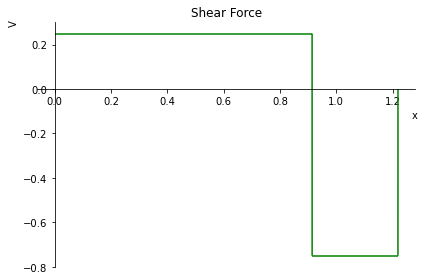

In [67]:
viga2.plot_shear_force(dic)

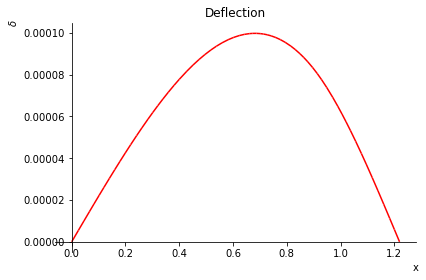

In [68]:
viga2.plot_deflection(dic)

#### Determinando a frequência pela fórmula de Dunkerley:

In [69]:
a11, a22, a12, a22, k, F, de, m, w = symbols('a_11 a_22 a_12 a_22 k F delta m omega')

* Encontrando o coeficiente de influência:

Podemos definir o coeficiente de influência como sendo $a = \dfrac{1}{k}$, e podemos escrever k em termos da deflexão, da seguinte maneira: $k = \dfrac{P}{\delta}$. De forma que, por simetria, $a_{11} = a_{22} = \dfrac{3L^3}{256EI}$ e $a_{12} = a_{21} = \dfrac{7L^3}{768EI}$

In [70]:
a11 = (3*L**3)/(256*E*I)
a11

3*L**3/(256*E*I)

In [71]:
a11 = a11.subs(dic)
a11

8.03424199380341e-5

In [72]:
a12 = (7*L**3)/(768*E*I)
a12 = a12.subs(dic)
a12

6.24885488406932e-5

In [73]:
a12 = a12.subs(dic)
a12

6.24885488406932e-5

In [74]:
a22 = (3*L**3)/(256*E*I)
a22

3*L**3/(256*E*I)

In [75]:
a22 = a22.subs(dic)
a22

8.03424199380341e-5

In [76]:
a21 = (7*L**3)/(768*E*I)
a21

7*L**3/(768*E*I)

In [77]:
a21 = a21.subs(dic)
a21

6.24885488406932e-5

* A frequência principal é dada por:

$\dfrac{1}{\omega^2_1} = a_{11}m_2 + a_{22}m_2$, no entanto, $a_{11} = a_{22}$ e $m_1 = m_2$, logo $\dfrac{1}{\omega^2_1} = 2am$
</br>
Isolando $\omega_1$, temos:

In [78]:
w = (1/(a11*m + a22*m))**0.5
w

78.8882910048193*(1/m)**0.5

In [79]:
dic2 = {L:1.2192, P:356, E:207*10**9, I:1.277*10**(-9), m:36.2874}

In [80]:
w.subs(dic2)

13.0958780375318

---

#### Usando o método das equações exatas:

In [81]:
z,ml,wl = symbols('z ml w')

In [82]:
# Nesse método as frequências podem ser calculadas por essa relação:
wl = (1/z)**0.5
wl

(1/z)**0.5

In [83]:
# Podemos achar z da seguinte forma:
z = (((a11*m)+(a22*m))/2) + (((((a11*m)+(a22*m))/2)**2)-(m**2)*((a11*a22) - (a12*a21)))**0.5
z

8.03424199380341e-5*m + 6.24885488406932e-5*(m**2)**0.5

In [84]:
z.subs(dic2)

0.00518296449646119

In [85]:
wl = (1/z.subs(dic2))**0.5  ##primeira frequência
wl

13.8902762488961

In [86]:
z2 = (((a11*m)+(a22*m))/2) - (((((a11*m)+(a22*m))/2)**2)-(m**2)*((a11*a22) - (a12*a21)))**0.5
z2

8.03424199380341e-5*m - 6.24885488406932e-5*(m**2)**0.5

In [87]:
z2.subs(dic2)

0.000647870562057649

In [88]:
wl2 = (1/z2.subs(dic2))**0.5 #segunda frequencia
wl2

39.2876341125955